In [ ]:
import numpy as np
import pandas as pd


In [ ]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.shape

(31608, 8)

In [ ]:
ratings.shape

(492084, 3)

In [ ]:
users.shape

(265585, 3)

In [ ]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [ ]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,1


In [ ]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,105463


In [ ]:
books.duplicated().sum()

np.int64(0)

In [ ]:
ratings.duplicated().sum()

np.int64(0)

In [ ]:
users.duplicated().sum()

np.int64(0)

**Performing EDA to undersatand data**

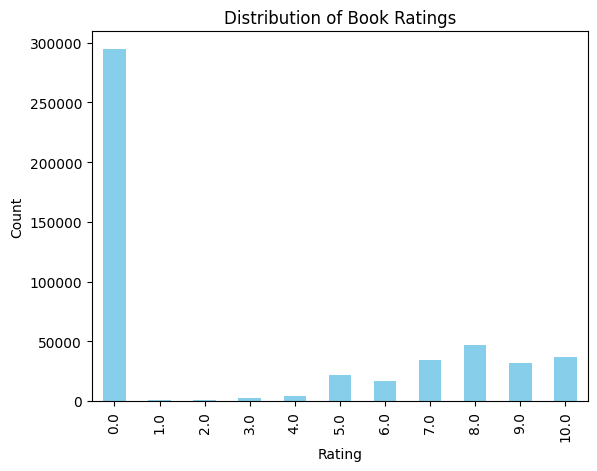

In [ ]:
import matplotlib.pyplot as plt

ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings")
plt.show()


In [ ]:
ratings_explicit = ratings[ratings['Book-Rating'] > 0]


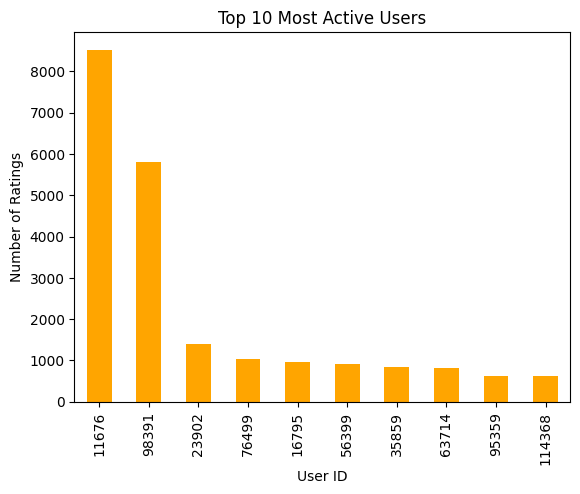

In [ ]:
top_users = ratings_explicit['User-ID'].value_counts().head(10)
top_users.plot(kind='bar', color='orange')
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Active Users")
plt.show()


                                             Book-Title    Book-Author
26                                          Wild Animus   Rich Shapero
305                                     A Painted House   John Grisham
356                             The Secret Life of Bees  Sue Monk Kidd
408                           The Lovely Bones: A Novel   Alice Sebold
522                 The Red Tent (Bestselling Backlist)  Anita Diamant
706   Where the Heart Is (Oprah's Book Club (Paperba...   Billie Letts
748                                   The Da Vinci Code      Dan Brown
1105    Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells
2143  Harry Potter and the Sorcerer's Stone (Harry P...  J. K. Rowling


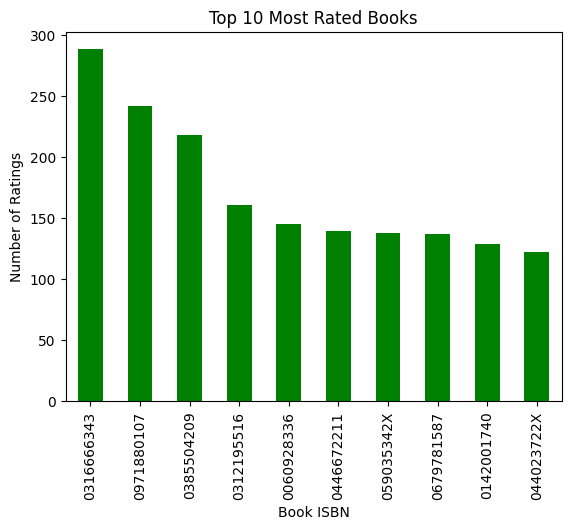

In [ ]:
top_books = ratings_explicit['ISBN'].value_counts().head(10)
top_books_titles = books[books['ISBN'].isin(top_books.index)][['Book-Title', 'Book-Author']]
print(top_books_titles)

top_books.plot(kind='bar', color='green')
plt.xlabel("Book ISBN")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Rated Books")
plt.show()


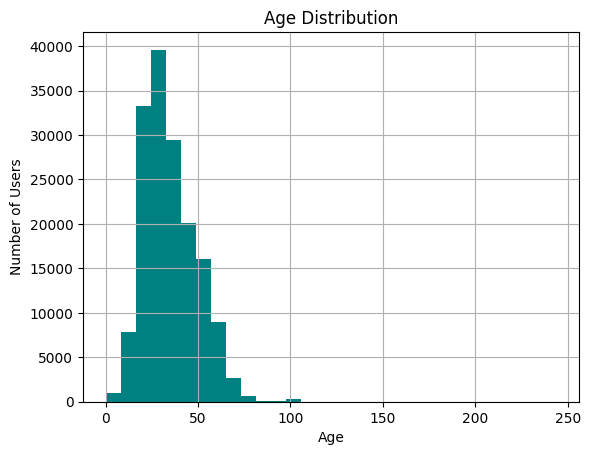

In [ ]:
users['Age'].hist(bins=30, color='teal')
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Age Distribution")
plt.show()


In [ ]:
users = users[(users['Age'] >= 5) & (users['Age'] <= 100)]


In [ ]:
users['Location'].value_counts().head(10)


,count
Location,
"london, england, united kingdom",1547
"sydney, new south wales, australia",1323
"madrid, madrid, spain",1272
"toronto, ontario, canada",1158
"melbourne, victoria, australia",1002
"chicago, illinois, usa",854
"barcelona, barcelona, spain",829
"berlin, berlin, germany",731
"barcelona, catalunya, spain",728


In [ ]:
location_split = users['Location'].str.split(',', expand=True)
users['City'] = location_split[0]
users['State'] = location_split[1]
users['Country'] = location_split[2]


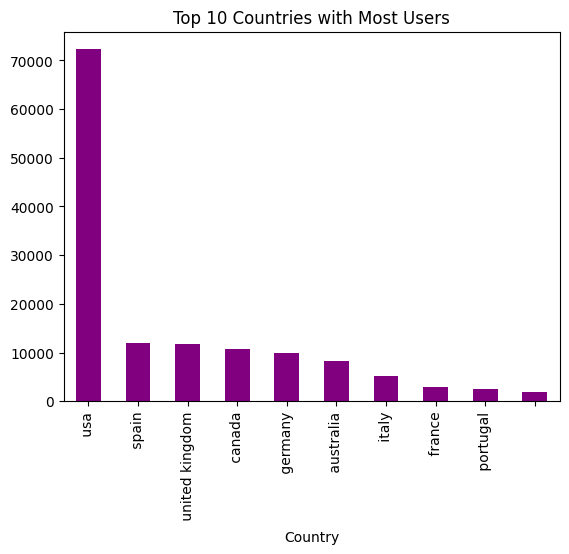

In [ ]:
users['Country'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Countries with Most Users")
plt.show()


In [ ]:
merged_df = ratings_explicit.merge(books, on='ISBN').merge(users, on='User-ID')
merged_df.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country
0,19,0375759778,7.0,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,"weston, ,",14.0,weston,,
1,42,0553582747,7.0,From the Corner of His Eye,Dean Koontz,2001,Bantam Books,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,"appleton, wisconsin, usa",17.0,appleton,wisconsin,usa
2,44,0440223571,8.0,This Year It Will Be Different: And Other Stories,Maeve Binchy,1997,Dell,http://images.amazon.com/images/P/0440223571.0...,http://images.amazon.com/images/P/0440223571.0...,http://images.amazon.com/images/P/0440223571.0...,"black mountain, north carolina, usa",51.0,black mountain,north carolina,usa
3,51,0440225701,9.0,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,"renton, washington, usa",34.0,renton,washington,usa
4,56,0671623249,7.0,LONESOME DOVE,Larry McMurtry,1986,Pocket,http://images.amazon.com/images/P/0671623249.0...,http://images.amazon.com/images/P/0671623249.0...,http://images.amazon.com/images/P/0671623249.0...,"cheyenne, wyoming, usa",24.0,cheyenne,wyoming,usa


In [ ]:
merged_df['Book-Author'].value_counts().head(10)


,count
Book-Author,
Stephen King,1230
John Grisham,685
Nora Roberts,660
James Patterson,626
J. K. Rowling,518
Dean R. Koontz,461
Mary Higgins Clark,431
Janet Evanovich,387
Dan Brown,384


In [ ]:
books['Publisher'].value_counts().head(10)


,count
Publisher,
Ballantine Books,808
Pocket,788
Bantam Books,619
Berkley Publishing Group,601
Harlequin,545
Warner Books,538
Penguin Books,495
Signet Book,454
Avon,453


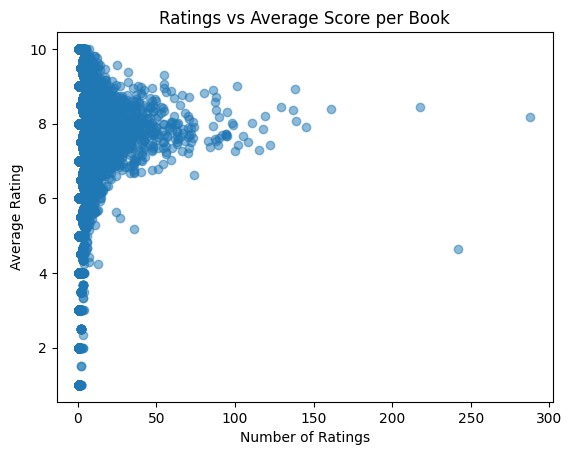

In [ ]:
book_stats = ratings_explicit.groupby('ISBN').agg({'Book-Rating': ['mean', 'count']})
book_stats.columns = ['Avg_Rating', 'Num_Ratings']

plt.scatter(book_stats['Num_Ratings'], book_stats['Avg_Rating'], alpha=0.5)
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Ratings vs Average Score per Book')
plt.show()


In [ ]:
# Drop duplicates
books.drop_duplicates(subset='ISBN', inplace=True)
# ratings = ratings[ratings['Book-Rating'] > 0]   # remove implicit ratings (0)

# Merge
df = ratings.merge(books, on='ISBN')

In [ ]:
# Filter users who rated at least 200 books
active_users = df['User-ID'].value_counts() > 50
active_users = active_users[active_users].index
df = df[df['User-ID'].isin(active_users)]

# Filter books with at least 50 ratings
popular_books = df['Book-Title'].value_counts() > 10
popular_books = popular_books[popular_books].index
df = df[df['Book-Title'].isin(popular_books)]

In [ ]:
print("Shape of df after merge and filtering:", df.shape)
print("Shape of book_pivot:", book_pivot.shape)

Shape of df after merge and filtering: (64059, 10)
Shape of book_pivot: (2604, 696)


In [ ]:
book_pivot = df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
book_pivot.fillna(0, inplace=True)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(book_pivot)
similarity_df = pd.DataFrame(similarity, index=book_pivot.index, columns=book_pivot.index)


In [ ]:
similarity_df.shape

(2604, 2604)

In [ ]:
similarity_df.head(5)

Book-Title,'Salem's Lot,101 Dalmatians,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,2010: Odyssey Two,2061: Odyssey Three,24 Hours,2nd Chance,311 Pelican Court,...,You Belong to Me and Other True Cases (Ann Rule's Crime Files: Vol. 2),"You Can't Scare Me! (Goosebumps, No 15)",Your Erroneous Zones,Your Oasis on Flame Lake (Ballantine Reader's Circle),Z for Zachariah,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zlata's Diary: A Child's Life in Sarajevo,Zoya,"\O\"" Is for Outlaw""",stardust
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101 Dalmatians,0.0,1.000000,0.000000,0.115886,0.000000,0.000000,0.137842,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.148076,0.000000
"14,000 Things to Be Happy About",0.0,0.000000,1.000000,0.032820,0.073232,0.000000,0.000000,0.086845,0.078079,0.0,...,0.0,0.279655,0.0,0.000000,0.167332,0.099422,0.000000,0.146645,0.044033,0.151573
1984,0.0,0.115886,0.032820,1.000000,0.132765,0.095204,0.000000,0.020359,0.018304,0.0,...,0.0,0.065560,0.0,0.000000,0.039228,0.161155,0.000000,0.034378,0.066951,0.035533
1st to Die: A Novel,0.0,0.000000,0.073232,0.132765,1.000000,0.062942,0.000000,0.126188,0.286048,0.0,...,0.0,0.146284,0.0,0.067201,0.087529,0.089154,0.071802,0.174115,0.181708,0.079286


In [ ]:
def recommend(book_name):
    if book_name not in similarity_df.index:
        return "Book not found."
    similar_books = similarity_df[book_name].sort_values(ascending=False)[1:10]
    return similar_books.index.tolist()

# Example:
print(recommend("A Painted House"))


['Colony', 'Poland', 'Bleachers', 'Midnight Bayou', 'The Mulberry Tree', 'The Brethren', 'A Monk Swimming : A Memoir', 'Spencerville', 'We Were the Mulvaneys']


In [ ]:
def show_book_details(book_list):
    if isinstance(book_list, list):
        for book in book_list:
            info = books[books['Book-Title'] == book][['Book-Title','Book-Author','Image-URL-L']].drop_duplicates().iloc[0]
            print(f"{info['Book-Title']} by {info['Book-Author']}")
            print(info['Image-URL-L'])
            print()
    else:
        print(book_list)

show_book_details(recommend("A Painted House"))

Colony by Anne Rivers Siddons
http://images.amazon.com/images/P/0061099708.01.LZZZZZZZ.jpg

Poland by James A. Michener
http://images.amazon.com/images/P/0394533887.01.LZZZZZZZ.jpg

Bleachers by John Grisham
http://images.amazon.com/images/P/0385511612.01.LZZZZZZZ.jpg

Midnight Bayou by Nora Roberts
http://images.amazon.com/images/P/0399148248.01.LZZZZZZZ.jpg

The Mulberry Tree by Jude Deveraux
http://images.amazon.com/images/P/0743437640.01.LZZZZZZZ.jpg

The Brethren by JOHN GRISHAM
http://images.amazon.com/images/P/0385497466.01.LZZZZZZZ.jpg

A Monk Swimming : A Memoir by Malachy McCourt
http://images.amazon.com/images/P/0786884142.01.LZZZZZZZ.jpg

Spencerville by Nelson DeMille
http://images.amazon.com/images/P/0446602450.01.LZZZZZZZ.jpg

We Were the Mulvaneys by Joyce Carol Oates
http://images.amazon.com/images/P/0452282829.01.LZZZZZZZ.jpg

